In [13]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [14]:
def generate_xor_data(n_samples):
    np.random.seed(0)
    X = np.random.rand(n_samples, 2)
    y = np.logical_xor(X[:, 0] > 0.5, X[:, 1] > 0.5)
    return X, y

In [15]:
def train_rbf_classifier(X, y, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    rbf_features = np.exp(-kmeans.transform(X_scaled) ** 2)

    rbf_classifier = MLPClassifier(hidden_layer_sizes=(n_clusters,), activation='identity', max_iter=10000)
    rbf_classifier.fit(rbf_features, y)

    return kmeans, scaler, rbf_classifier

In [16]:
def predict_rbf_classifier(X, kmeans, scaler, rbf_classifier):
    X_scaled = scaler.transform(X)
    rbf_features = np.exp(-kmeans.transform(X_scaled) ** 2)
    return rbf_classifier.predict(rbf_features)

In [17]:
X_train, y_train = generate_xor_data(200)
X_test, y_test = generate_xor_data(100)

kmeans, scaler, rbf_classifier = train_rbf_classifier(X_train, y_train)
y_pred = predict_rbf_classifier(X_test, kmeans, scaler, rbf_classifier)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.54


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


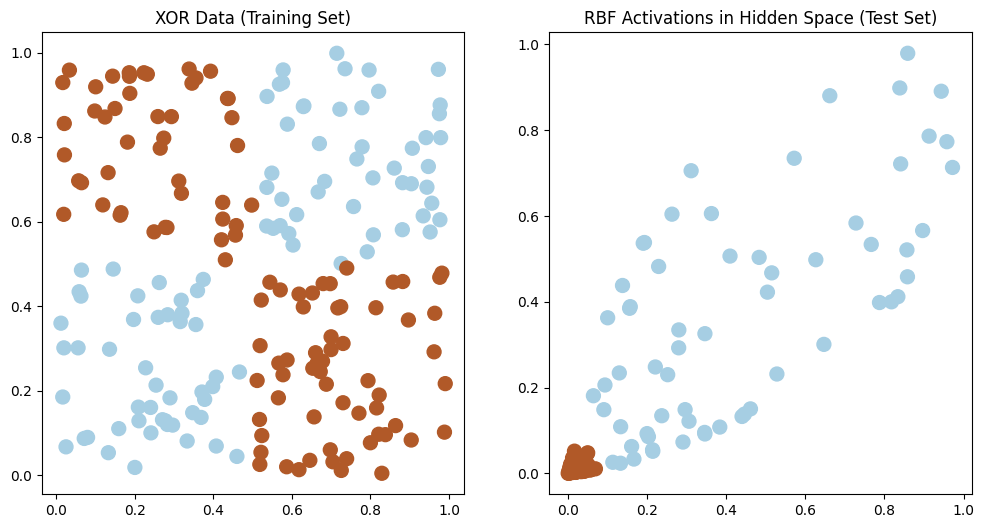

In [18]:
# Plot XOR data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, s=100)
plt.title("XOR Data (Training Set)")

# Plot RBF activations in hidden space
X_test_scaled = scaler.transform(X_test)
rbf_features_test = np.exp(-kmeans.transform(X_test_scaled) ** 2)

plt.subplot(1, 2, 2)
plt.scatter(rbf_features_test[:, 0], rbf_features_test[:, 1], c=y_pred, cmap=plt.cm.Paired, s=100)
plt.title("RBF Activations in Hidden Space (Test Set)")

plt.show()